### Подключение библиотек

In [119]:
# импортируем все необходимые библиотеки
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import operator
from sklearn.preprocessing import LabelEncoder
import math
import warnings
warnings.filterwarnings('ignore')
import collections
from sklearn.metrics import *
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.cross_validation import StratifiedKFold
from sklearn.cross_validation import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
pd.options.display.max_columns = 400
import statsmodels.api as sm
import sklearn as sk
import scipy as sp
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.linear_model import RidgeClassifier,LogisticRegression
from sklearn.cross_validation import KFold
import xgboost as xgb
from sklearn.linear_model import LinearRegression
import sklearn
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score

### Загрузка данных

In [2]:
# загружаем данные, указываем разделитель
# аграрно-промышленная отрасль
df1 = pd.read_csv('data/2015_2.csv', sep=',')

In [3]:
df1.head(2)

,Наименование,ОКПО,ОКОПФ,ОКФС,ОКВЭД,ИНН,Код единицы измерения,Тип отчета,1110,1120,1130,1140,1150,1160,1170,1180,1190,1100,1210,1220,1230,1240,1250,1260,1200,1600,1310,1320,1340,1350,1360,1370,1300,1410,1420,1430,1450,1400,1510,1520,1530,1540,1550,1500,1700,2110,2120,2100,2210,2220,2200,2310,2320,2330,2340,2350,2300,2410,2421,2430,2450,2460,2400,2510,2520,2500,3200,3310,3314,3315,3316,3320,3324,3325,3326,3300,3600,Дата актуализации,Ликвидировано
0,"Общество с ограниченной ответственностью ""Де В...",72903073,12300,16,03.1,6658183636,384,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,-1515,1495,0,0,0,0,21,0,0,0,0,0,1,0,0,0,0,0,0,0,0,4,0,19,0,0,0,0,0,0,-23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20170705,0
1,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ЗЕЛЁ...",85447582,12300,16,01.30,6674244773,384,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,0,0,10,0,0,0,0,0,0,10,0,0,0,0,0,0,0,0,0,0,0,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20170629,0


In [4]:
# отображаем размер выборки (проверка, что все столбцы и строки загрузились)
df1.shape

(1091, 79)

In [5]:
# отображаем общую информацию о данных и проверяем типы данных
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1091 entries, 0 to 1090
Data columns (total 79 columns):
Наименование             1091 non-null object
ОКПО                     1091 non-null int64
ОКОПФ                    1091 non-null int64
ОКФС                     1091 non-null int64
ОКВЭД                    1091 non-null object
ИНН                      1091 non-null int64
Код единицы измерения    1091 non-null int64
Тип отчета               1091 non-null int64
1110                     1091 non-null int64
1120                     1091 non-null int64
1130                     1091 non-null int64
1140                     1091 non-null int64
1150                     1091 non-null int64
1160                     1091 non-null int64
1170                     1091 non-null int64
1180                     1091 non-null int64
1190                     1091 non-null int64
1100                     1091 non-null int64
1210                     1091 non-null int64
1220                     1091 non-nu

In [6]:
# df1['Дата актуализации'] = pd.to_datetime(df1['Дата актуализации'], format='%Y.%m.%d')

In [7]:
# df1['Дата актуализации'].head()

In [8]:
df1['Наименование'].value_counts()[0:26]

ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ "НИВА"          4
ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ "СПЕКТР"        3
ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ "ФОРЕСТ"        3
ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ "ЭВЕРЕСТ"       3
ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ "УРАЛЛЕС"       2
ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ "ЛЕСНОЕ"        2
Общество с ограниченной ответственностью "ЛесТорг"       2
ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ "УРАЛСИБЛЕС"    2
ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ "ПРОГРЕСС"      2
ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ "ЛЕСХОЗ"        2
ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ "РОДИНА"        2
ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ "ЛЕС"           2
ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ "ЭКОПРОДУКТ"    2
Общество с ограниченной ответственностью "Велес"         2
ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ "ТАЙГА"         2
ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ "ЛИДЕР"         2
Общество с ограниченной ответственностью "Форест"       

### Проверяем на наличие NaN

In [9]:
for col in df1.columns:
    nan_numbers = df1[pd.isnull(df1[col])].shape[0]
    if nan_numbers > 0:
        print(col, nan_numbers)

### Смотрим на соотношение классов в выборке

In [10]:
df1['Ликвидировано'].value_counts(normalize=True)

0    0.989001
1    0.010999
Name: Ликвидировано, dtype: float64

### Статистика по выборке

In [11]:
df1.describe()

,ОКПО,ОКОПФ,ОКФС,ИНН,Код единицы измерения,Тип отчета,1110,1120,1130,1140,1150,1160,1170,1180,1190,1100,1210,1220,1230,1240,1250,1260,1200,1600,1310,1320,1340,1350,1360,1370,1300,1410,1420,1430,1450,1400,1510,1520,1530,1540,1550,1500,1700,2110,2120,2100,2210,2220,2200,2310,2320,2330,2340,2350,2300,2410,2421,2430,2450,2460,2400,2510,2520,2500,3200,3310,3314,3315,3316,3320,3324,3325,3326,3300,3600,Дата актуализации,Ликвидировано
count,1.091000e+03,1091.000000,1091.000000,1.091000e+03,1091.000000,1091.000000,1091.000000,1091.0,1091.000000,1091.0,1.091000e+03,1091.000000,1091.000000,1091.000000,1091.000000,1.091000e+03,1.091000e+03,1091.000000,1.091000e+03,1091.000000,1091.000000,1091.000000,1.091000e+03,1.091000e+03,1.091000e+03,1091.000000,1091.000000,1.091000e+03,1091.000000,1.091000e+03,1.091000e+03,1.091000e+03,1091.000000,1091.0,1091.000000,1.091000e+03,1.091000e+03,1091.000000,1091.000000,1091.000000,1091.00000,1.091000e+03,1.091000e+03,1.091000e+03,1.091000e+03,1.091000e+03,1091.000000,1091.000000,1.091000e+03,1091.000000,1091.000000,1091.000000,1091.000000,1091.000000,1.091000e+03,1091.000000,1091.000000,1091.000000,1091.000000,1091.000000,1.091000e+03,1091.000000,1091.000000,1.091000e+03,1091.000000,1091.000000,1091.0,1091.000000,1091.0,1091.000000,1091.0,1091.000000,1091.0,1091.000000,1.091000e+03,1.091000e+03,1091.000000
mean,4.736803e+07,7352.505958,16.350137,6.649733e+09,383.951421,1.558203,12.890926,0.0,0.978002,0.0,3.053572e+04,0.581118,1924.392301,29.078827,1975.351054,3.308649e+04,1.429500e+04,35.524290,8.613846e+03,1265.138405,663.307974,140.588451,2.293544e+04,5.949249e+04,9.223115e+03,-1.846013,1984.645280,2.676196e+03,638.821265,1.535557e+04,3.100003e+04,9.387904e+03,4.568286,0.0,888.520623,9.601010e+03,7.218368e+03,8612.945921,2090.804766,104.879010,166.07791,1.652681e+04,5.937596e+04,3.890155e+04,3.306281e+04,5.565249e+03,1577.620532,578.716774,3.422578e+03,6.438130,77.565536,1497.263061,4590.492209,2509.055912,4.088672e+03,72.543538,-7.385885,1.263061,36.516957,56.681943,4.258021e+03,438.782768,-0.396884,4.463764e+03,-1.836847,1.836847,0.0,1.836847,0.0,13.957837,0.0,13.957837,0.0,-13.957837,3.221946e+04,2.017042e+07,0.010999
std,3.072893e+07,6080.620300,3.124077,2.599710e+07,0.219309,0.498672,231.017736,0.0,31.912171,0.0,2.104599e+05,19.194503,28344.339388,383.685727,14791.654840,2.351681e+05,6.218322e+04,297.664096,1.072135e+05,14748.690903,4147.139962,1150.498794,1.573244e+05,3.814311e+05,9.544663e+04,60.672063,19170.213961,5.451235e+04,7170.189115,1.717208e+05,2.001867e+05,9.198093e+04,80.977127,0.0,13880.825865,9.290037e+04,6.749590e+04,43316.662852,17817.242949,1096.750399,1840.54866,1.114512e+05,3.814343e+05,2.583235e+05,2.116676e+05,6.168982e+04,14460.174608,3985.867230,5.720568e+04,122.135151,1072.728156,15470.038387,26582.097931,18974.114476,5.785251e+04,620.622652,179.044104,43.573301,792.547220,314.580727,5.785670e+04,15414.978859,11.692433,6.079905e+04,60.671585,60.671585,0.0,60.671585,0.0,461.031387,0.0,461.031387,0.0,461.031387,2.301497e+05,1.347219e+02,0.104346
min,5.141100e+04,47.000000,10.000000,6.601005e+09,383.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,-5.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,-5.000000e+00,0.000000e+00,-2004.000000,-4572.000000,0.000000e+00,0.000000,-1.489462e+06,-8.656700e+04,-2.100000e+03,0.000000,0.0,-7682.000000,0.000000e+00,-1.440000e+03,0.000000,0.000000,0.000000,0.00000,0.000000e+00,-4.100000e+01,0.000000e+00,0.000000e+00,-9.645000e+04,0.000000,-50.000000,-1.325570e+05,0.000000,0.000000,0.000000,0.000000,0.000000,-4.849120e+05,0.000000,-5502.000000,-556.000000,-261.000000,-543.000000,-4.849120e+05,-43200.000000,-383.000000,-4.849120e+05,-2004.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,-15228.000000,-5.756400e+04,2.017012e+07,0.000000
25%,1.875512e+07,65.000000,16.000000,6.625056e+09,384.000000,1.000000,0.000000,0.0,0.000000,0.0,0.000000e+00,0.000000,0.00

In [12]:
df1.describe(include = 'object').T

,count,unique,top,freq
Наименование,1091,1060,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""НИВА""",4
ОКВЭД,1091,78,02.20,177


### Строим функции плотности вероятности для признаков и смотрим на распределения

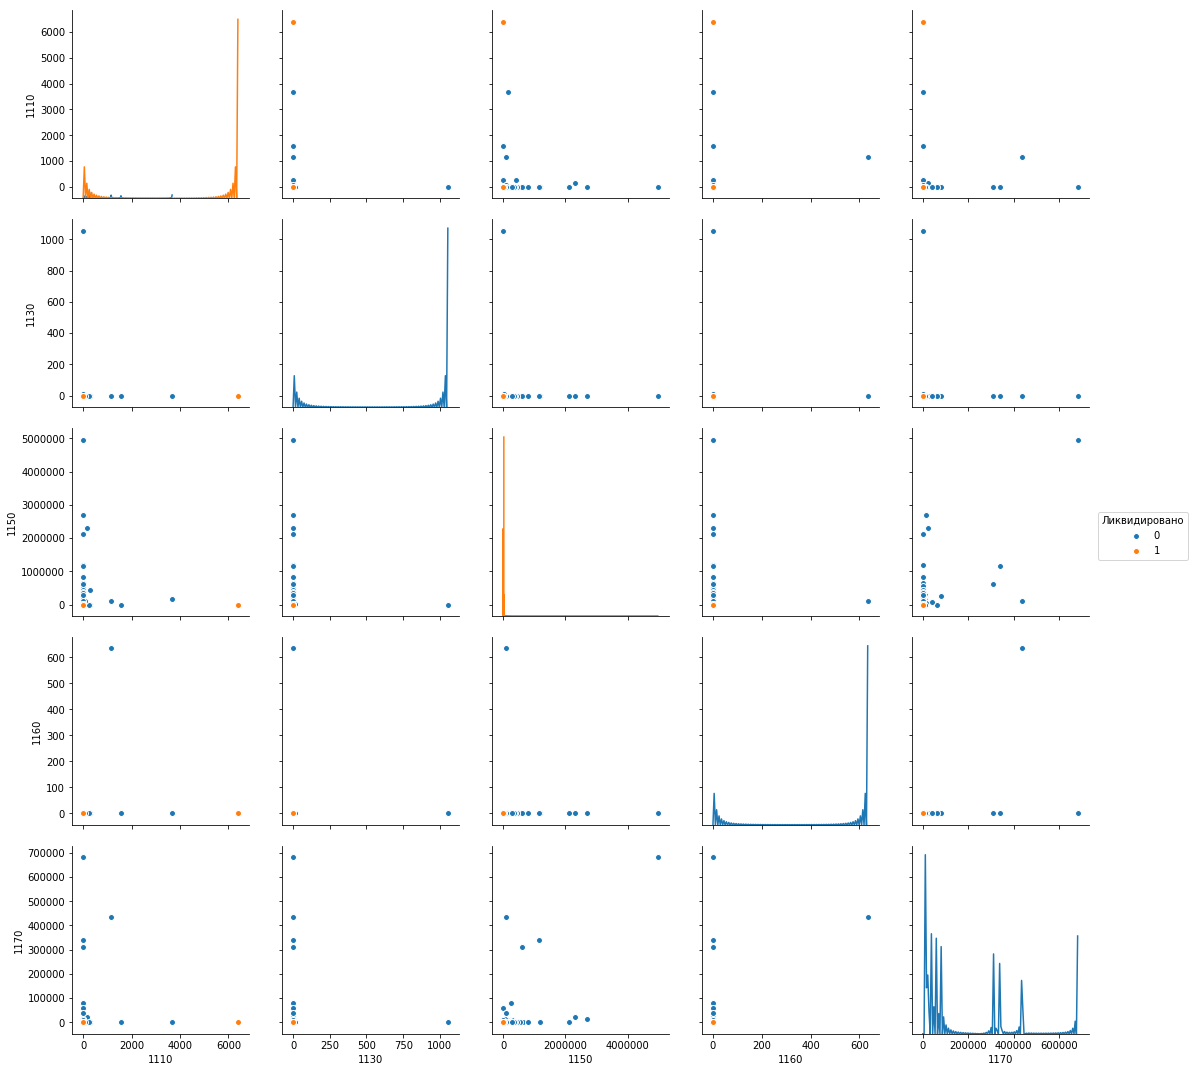

In [13]:
plot_features = ['1110', '1130', '1150', '1160', '1170']
new_palette = sns.color_palette("Paired")
sns.pairplot(df1, vars=plot_features, hue="Ликвидировано", size=3, diag_kind="kde")

### Строим функции плотности вероятности для признаков и смотрим на распределения¶

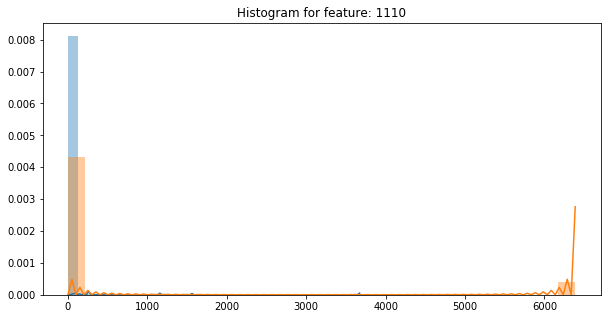

In [15]:
plot_features = ['1110']
plt.figure(figsize=(10,5))
grids = gridspec.GridSpec(len(plot_features),1)
for i,j in enumerate(df1[plot_features]):
    ax = plt.subplot(grids[i])
    sns.distplot(df1[j][df1.Ликвидировано == 0], bins=30)
    sns.distplot(df1[j][df1.Ликвидировано == 1], bins=30)
    ax.set_xlabel('')
    ax.set_title('Histogram for feature: ' + str(j))
plt.show()

### Корреляция (только статьи)

In [16]:
df1_1 = df1.iloc[:,8:32]
df1_2 = df1.iloc[:,32:56]
df1_3 = df1.iloc[:,56:77]

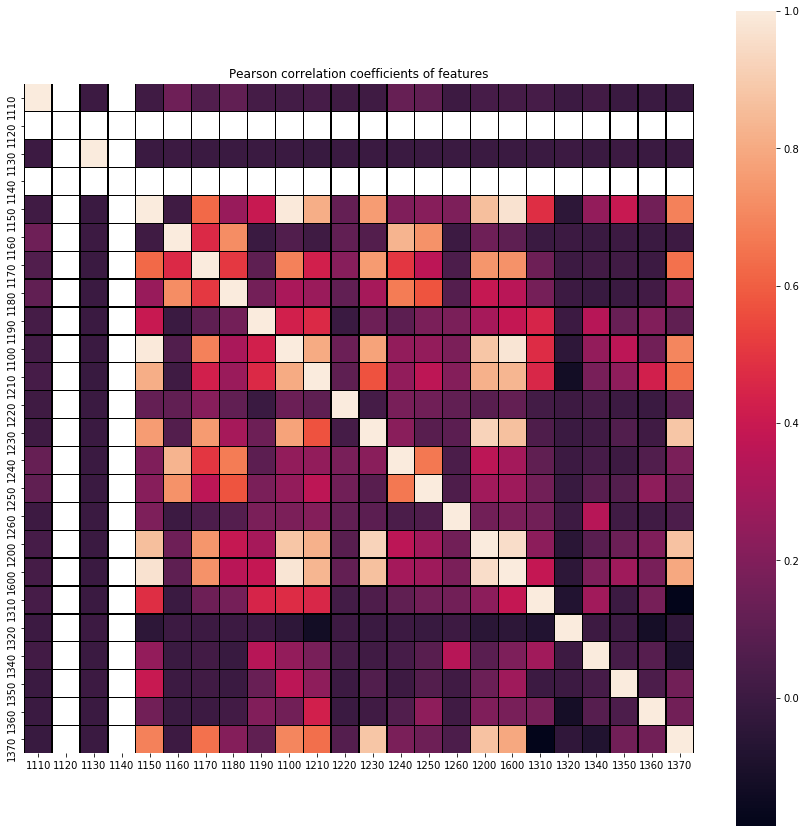

In [17]:
f, ax = plt.subplots(figsize=(15, 15))
plt.title('Pearson correlation coefficients of features')
sns.heatmap(df1_1.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, linecolor='black')

In [18]:
# статьи 1120, 1140 постоянны - только нули (необходимо убрать данные признаки перед построением модели)
df1['1120'].unique(), df1['1140'].unique()

(array([0], dtype=int64), array([0], dtype=int64))

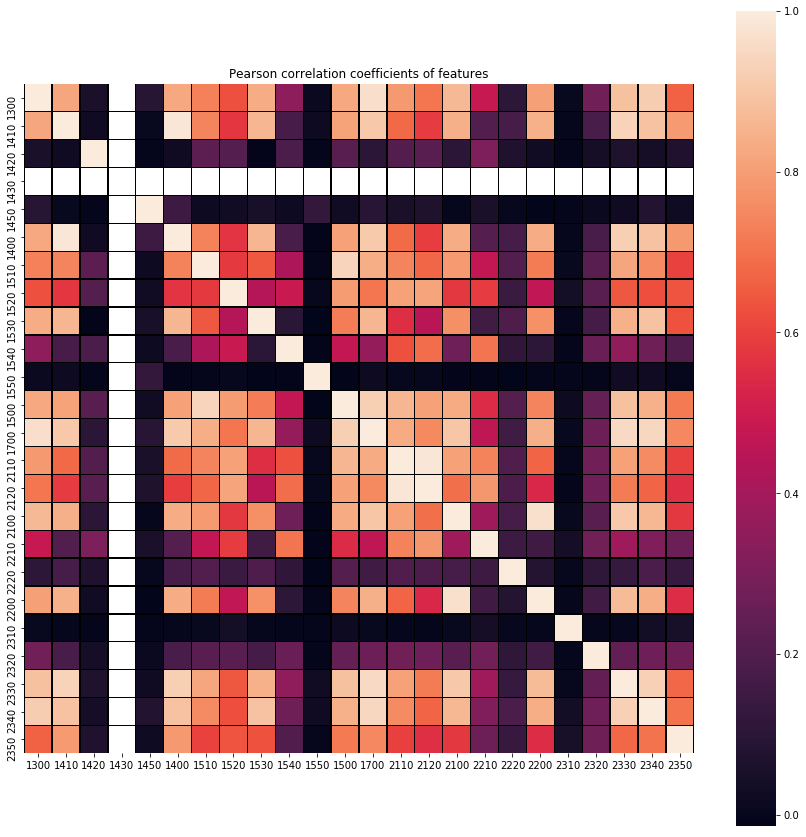

In [19]:
f, ax = plt.subplots(figsize=(15, 15))
plt.title('Pearson correlation coefficients of features')
sns.heatmap(df1_2.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, linecolor='black')

In [20]:
# статья 1430 постоянна - только нули (необходимо убрать перед построением модели)
df1['1430'].unique()

array([0], dtype=int64)

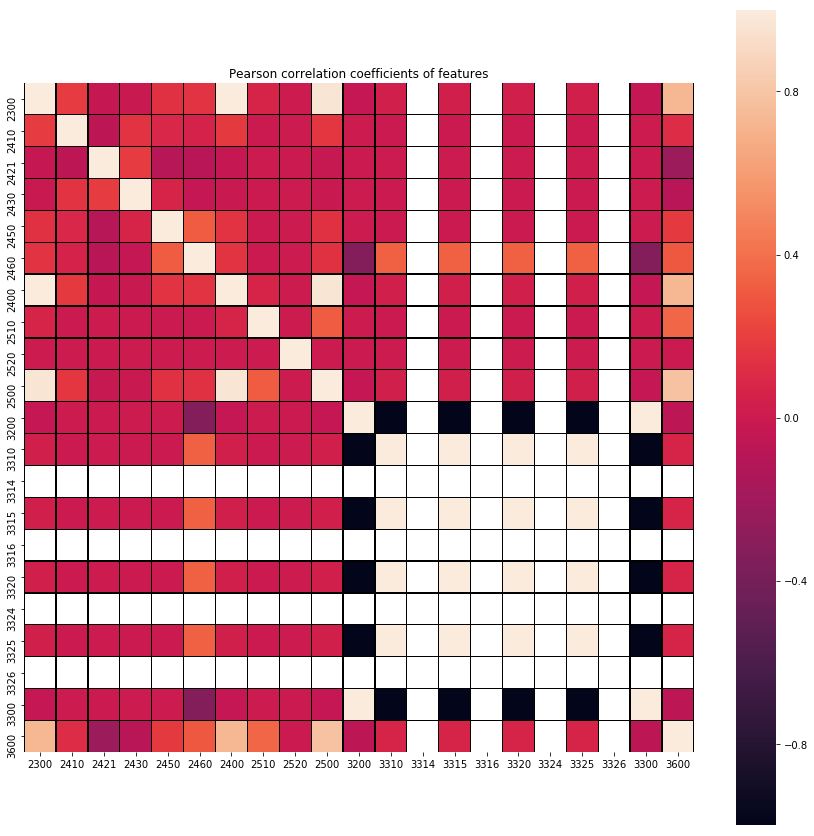

In [21]:
f, ax = plt.subplots(figsize=(15, 15))
plt.title('Pearson correlation coefficients of features')
sns.heatmap(df1_3.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, linecolor='black')

In [22]:
# статьи 3314, 3316, 3324, 3326 постоянны - только нули (необходимо убрать данные признаки перед построением модели)
df1['3314'].unique(), df1['3316'].unique(), df1['3324'].unique(), df1['3326'].unique()

(array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64))

### Корреляция признаков с целевой переменной

In [23]:
def CorrelationSelector(x,y):
    columns = x.columns
    corr_data = dict([(abs(np.corrcoef(x[c],y)[0,1]),c) for c in columns if math.isnan(abs(np.corrcoef(x[c],y)[0,1]))==False])
    sorted_corr_data = sorted(corr_data.items(), key=operator.itemgetter(0), reverse=True)
    return sorted_corr_data

In [24]:
CorrelationSelector(df1.drop(['Ликвидировано', 'Наименование', 'ОКВЭД'],1),df1['Ликвидировано'])[0:20]

[(0.2372308176506001, '1110'),
 (0.10190945974477206, 'ИНН'),
 (0.07289256076629282, 'ОКОПФ'),
 (0.024013436439178488, '1210'),
 (0.020697466985145234, 'Дата актуализации'),
 (0.020267864300771814, 'ОКФС'),
 (0.01828374412539774, '2460'),
 (0.0178588412803494, '2340'),
 (0.01681994714772616, '1250'),
 (0.01671965156429989, 'Код единицы измерения'),
 (0.016492408044631663, '1520'),
 (0.016434369691088437, '2120'),
 (0.01636448766820265, '1300'),
 (0.015878049136746574, '2110'),
 (0.015598572825434613, '1600'),
 (0.015566208088033745, '1700'),
 (0.015286471169226212, '1200'),
 (0.01477021745655807, '3600'),
 (0.014203396311271523, '1370'),
 (0.01416953367171291, '1150')]

### Посмотрим, насколько можем понизить размерность задачи без значительно потери информации

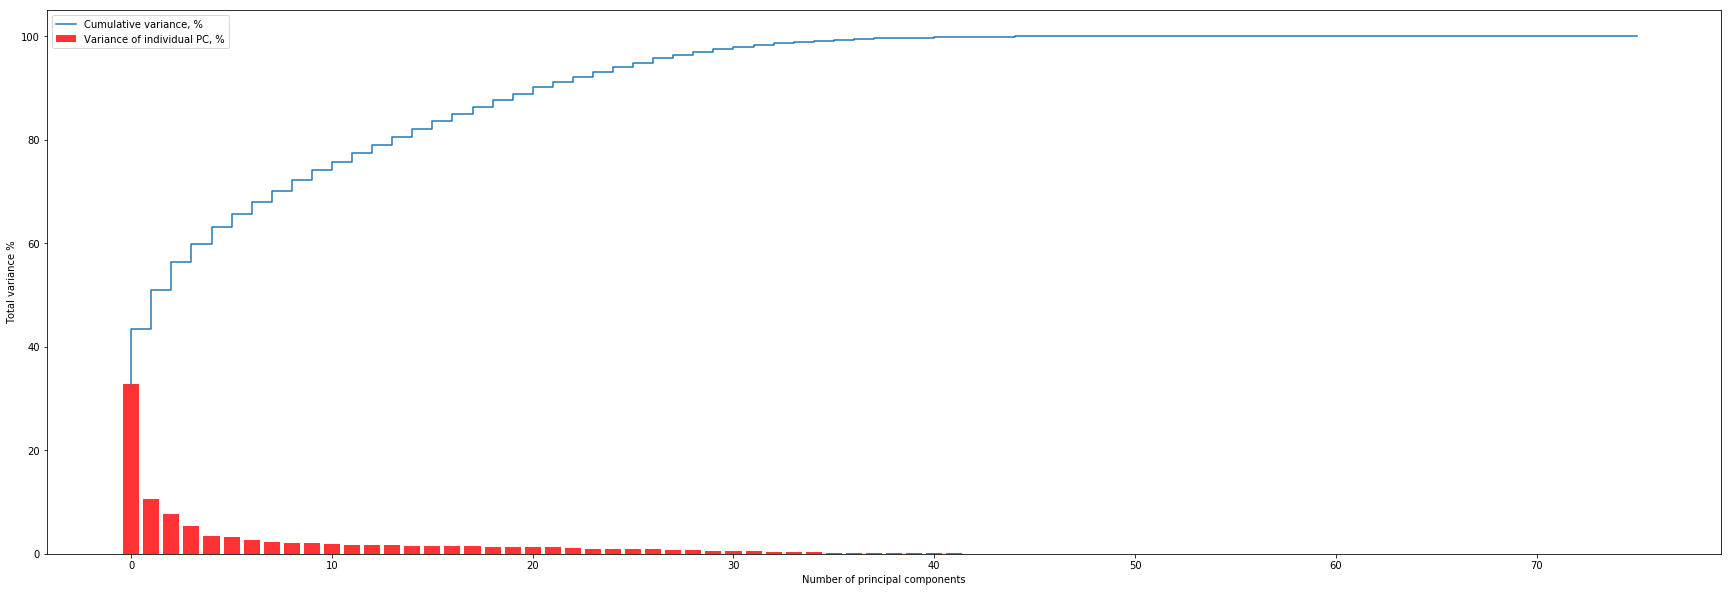

In [25]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(df1.drop(['Ликвидировано', 'Наименование', 'ОКВЭД'],1))
from numpy.linalg import eig
covX = np.cov(x_scaled.T)
eigs, vecs = eig(covX)
eig_pairs = [(abs(eigs[i]),vecs[:,i]) for i in range(len(eigs))]
eig_pairs.sort(key = lambda x: x[0], reverse= True)
E = sum(eigs)
exp_variance = [(i/E)*100 for i in sorted(eigs, reverse=True)] # Individual explained variance
cum_variance = np.cumsum(exp_variance) # Cumulative explained variance

plt.figure(figsize=(30,10))
plt.bar(range(len(eigs)), exp_variance, alpha=0.8, label='Variance of individual PC, %', color = 'r')
plt.step(range(len(eigs)), cum_variance, label='Cumulative variance, %')
plt.ylabel('Total variance %')
plt.xlabel('Number of principal components')
plt.legend()
plt.show()

In [26]:
# Для сохранения 90% информации необходимо от 20 до 25 признаков 
# Возможно стоит сделать отбор признаков 

### Преобразование переменных

In [27]:
df1.columns

Index(['Наименование', 'ОКПО', 'ОКОПФ', 'ОКФС', 'ОКВЭД', 'ИНН',
       'Код единицы измерения', 'Тип отчета', '1110', '1120', '1130', '1140',
       '1150', '1160', '1170', '1180', '1190', '1100', '1210', '1220', '1230',
       '1240', '1250', '1260', '1200', '1600', '1310', '1320', '1340', '1350',
       '1360', '1370', '1300', '1410', '1420', '1430', '1450', '1400', '1510',
       '1520', '1530', '1540', '1550', '1500', '1700', '2110', '2120', '2100',
       '2210', '2220', '2200', '2310', '2320', '2330', '2340', '2350', '2300',
       '2410', '2421', '2430', '2450', '2460', '2400', '2510', '2520', '2500',
       '3200', '3310', '3314', '3315', '3316', '3320', '3324', '3325', '3326',
       '3300', '3600', 'Дата актуализации', 'Ликвидировано'],
      dtype='object')

In [28]:
# ОКПО Общероссийский классификатор предприятий и организаций  - не преобразуем, убираем из датасета при построении модели
        # В первом разделе общероссийском классификаторе находятся коды, созданные кодированием порядкового номера. Здесь создаются первые восемь цифр. Причем, первые семь – это сведения согласно порядковому номеру, а восьмая – контрольное число.
        # Источник: http://vseproip.com/otkrytie-i-zakrytie-ip/okpo/skolko-cifr-soderzhit-kod-okpo.html
        
# ОКОПФ  Общероссийский Классификатор Организационно-Правовых Форм  - может попробовать первую цифру вытащить!!
        # http://ip-nalog.ru/kody-statistiki/okopf.html 
        # количество цифр разное, если только первую вытаскивать от 1 до 7 (1, 4, 5, 6 - в первом датасете)
            # 1 00 00 - организационно-правовые формы юридических лиц, являющихся коммерческими корпоративными организациями;
            # 4 00 00 - организационно-правовые формы международных организаций, осуществляющих деятельность на территории Российской Федерации;
            # 5 00 00 - организационно-правовые формы для деятельности граждан (физических лиц).
            # 6 00 00 - организационно-правовые формы юридических лиц, являющихся коммерческими унитарными организациями.
            
# ОКФС Общероссийский Классификатор Форм Собственности  - преобразуем
        # http://ip-nalog.ru/kody-statistiki/okfs.html
        # либо в 4 столбца, либо в 12
    
# ОКВЭД Общероссийский классификатор видов экономической деятельности - преобразуем
        # Первые 4 цифры или 3 цифры, в столбцы
        # XX — класс;
        # ХХ.Х — подкласс;
        # ХХ.ХХ — группа;
    
# ИНН Индивидуальный номер налогоплательщика  - преобразуем, вытаскиваем номер налоговой инспекции
        # 2 цифры - код субъекта РФ
        # следующие 2 -номер местной налоговой инспекции
        # далее номер записи и контрольные цифры
        
# Код единицы измерения - преобразуем, перевод в тысячи рублей
        # 384 Тысяча рублей   95% записей
        # 383 Рубль 
        # 385 Миллион рублей
        
# Тип отчета - 0,1,2 - до конца не понятно что это, не преобразуем, убираем из датасета

In [29]:
# преобразование ИНН
df1['Tax_inspection'] = df1['ИНН'].map(lambda x: str(x)[:-6]) # удаление последних 6 символов
df1['Tax_inspection'] = df1['Tax_inspection'].map(lambda x: str(x)[2:]) # удаление первых 2 символов

In [30]:
df1['Tax_inspection'].unique()

array(['58', '74', '34', '17', '33', '12', '19', '79', '60', '80', '23',
       '42', '85', '78', '06', '76', '77', '86', '81', '84', '25', '70',
       '59', '71', '48', '52', '26', '82', '11', '16', '01', '37', '14',
       '51', '03', '13', '56', '72', '54', '57', '83', '10', '43', '09',
       '53', '45', '38', '46', '36', '04', '35', '44', '27', '39', '31',
       '55', '62', '64', '49', '32', '40', '28', '63', '24', '05', '20',
       '47', '73', '21', '15', '29', '02', '30', '07', '22', '50'],
      dtype=object)

In [31]:
df1['Tax_inspection'].value_counts(normalize=True).head(5)

70    0.056829
58    0.056829
71    0.048579
33    0.040330
23    0.039413
Name: Tax_inspection, dtype: float64

In [32]:
# преобразование ОКВЭД
# df1['ОКВЭД1'] = df1['ОКВЭД'].map(lambda x: len(x)<=4)
# подумать как оставить первые символы

In [33]:
df1['ОКФС'].value_counts(normalize=True)

16    0.963336
13    0.006416
34    0.005500
12    0.004583
49    0.003666
42    0.002750
41    0.002750
24    0.002750
19    0.002750
10    0.002750
23    0.001833
17    0.000917
Name: ОКФС, dtype: float64

In [34]:
# преобразование ОКОПФ
# df['ОКОПФ'].value_counts(normalize=True)
# df1['ОКОПФ1'] = df1['ОКОПФ'].map(lambda x: str(x)[:-4]) # удаление последних 4 символов
# надо не удалять последние символы, а оставить только первый

In [35]:
# преобразование единиц измерения
df1['Код единицы измерения'].value_counts(normalize=True)
# 384 Тысяча рублей
# 383 Рубль 
# 385 Миллион рублей

384    0.949588
383    0.049496
385    0.000917
Name: Код единицы измерения, dtype: float64

In [63]:
df1_384 = df1[df1['Код единицы измерения']==384]
df1_383 = df1[df1['Код единицы измерения']==383]
df1_385 = df1[df1['Код единицы измерения']==385]

In [64]:
df1_384.shape, df1_383.shape, df1_385.shape

((1036, 80), (54, 80), (1, 80))

In [65]:
# не корректно работает, пока оставила только df1_384 (только тыс рублей единицы измерения)
# feature = df1_385[['1110', '1120', '1130', '1140','1150', '1160', '1170', '1180', '1190', '1100', '1210', '1220', '1230','1240', '1250', 
#         '1260', '1200', '1600', '1310', '1320', '1340', '1350','1360', '1370', '1300', '1410', '1420', '1430', '1450', '1400', '1510', '1520',
#         '1530', '1540', '1550', '1500', '1700', '2110', '2120', '2100','2210', '2220', '2200', '2310', '2320', '2330', '2340', '2350', '2300',
#         '2410', '2421', '2430', '2450', '2460', '2400', '2510', '2520', '2500','3200', '3310', '3314', '3315', '3316', '3320', '3324', '3325', '3326',
#         '3300', '3600']]*1000
# df1_385 = df1_385[['Наименование', 'ОКПО', 'ОКОПФ', 'ОКФС', 'ОКВЭД', 'ИНН',
#        'Код единицы измерения', 'Тип отчета', 'Дата актуализации', 'Ликвидировано', 'Tax_inspection']]
# df1_385= np.concatenate((df1_385, feature), axis=1)

In [66]:
df1['Тип отчета'].value_counts(normalize=True)

2    0.559120
1    0.439963
0    0.000917
Name: Тип отчета, dtype: float64

### Кодировка признаков

In [67]:
# Кодируем признак 'ОКФС' и 'Tax_inspection'
df1_384 = pd.concat([df1_384, pd.get_dummies(df1_384['ОКФС'], prefix="ОКФС"),
                            pd.get_dummies(df1_384['Tax_inspection'], prefix="Tax_inspection")],
                            axis=1)

In [68]:
df1_384.head(2)

,Наименование,ОКПО,ОКОПФ,ОКФС,ОКВЭД,ИНН,Код единицы измерения,Тип отчета,1110,1120,1130,1140,1150,1160,1170,1180,1190,1100,1210,1220,1230,1240,1250,1260,1200,1600,1310,1320,1340,1350,1360,1370,1300,1410,1420,1430,1450,1400,1510,1520,1530,1540,1550,1500,1700,2110,2120,2100,2210,2220,2200,2310,2320,2330,2340,2350,2300,2410,2421,2430,2450,2460,2400,2510,2520,2500,3200,3310,3314,3315,3316,3320,3324,3325,3326,3300,3600,Дата актуализации,Ликвидировано,Tax_inspection,ОКФС_10,ОКФС_12,ОКФС_13,ОКФС_16,ОКФС_17,ОКФС_19,ОКФС_23,ОКФС_24,ОКФС_34,ОКФС_41,ОКФС_42,ОКФС_49,Tax_inspection_01,Tax_inspection_02,Tax_inspection_03,Tax_inspection_04,Tax_inspection_05,Tax_inspection_06,Tax_inspection_07,Tax_inspection_09,Tax_inspection_10,Tax_inspection_11,Tax_inspection_12,Tax_inspection_13,Tax_inspection_14,Tax_inspection_15,Tax_inspection_16,Tax_inspection_17,Tax_inspection_19,Tax_inspection_20,Tax_inspection_21,Tax_inspection_22,Tax_inspection_23,Tax_inspection_24,Tax_inspection_25,Tax_inspection_26,Tax_inspection_27,Tax_inspection_28,Tax_inspection_29,Tax_inspection_30,Tax_inspection_31,Tax_inspection_32,Tax_inspection_33,Tax_inspection_34,Tax_inspection_35,Tax_inspection_36,Tax_inspection_37,Tax_inspection_38,Tax_inspection_39,Tax_inspection_40,Tax_inspection_42,Tax_inspection_43,Tax_inspection_44,Tax_inspection_45,Tax_inspection_46,Tax_inspection_47,Tax_inspection_48,Tax_inspection_49,Tax_inspection_50,Tax_inspection_51,Tax_inspection_52,Tax_inspection_53,Tax_inspection_54,Tax_inspection_55,Tax_inspection_56,Tax_inspection_57,Tax_inspection_58,Tax_inspection_59,Tax_inspection_60,Tax_inspection_62,Tax_inspection_63,Tax_inspection_64,Tax_inspection_70,Tax_inspection_71,Tax_inspection_72,Tax_inspection_73,Tax_inspection_74,Tax_inspection_76,Tax_inspection_77,Tax_inspection_78,Tax_inspection_79,Tax_inspection_80,Tax_inspection_81,Tax_inspection_82,Tax_inspection_83,Tax_inspection_84,Tax_inspection_85,Tax_inspection_86
0,"Общество с ограниченной ответственностью ""Де В...",72903073,12300,16,03.1,6658183636,384,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,-1515,1495,0,0,0,0,21,0,0,0,0,0,1,0,0,0,0,0,0,0,0,4,0,19,0,0,0,0,0,0,-23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20170705,0,58,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ЗЕЛЁ...",85447582,12300,16,01.30,6674244773,384,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,0,0,10,0,0,0,0,0,0,10,0,0,0,0,0,0,0,0,0,0,0,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20170629,0,74,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


### Удаление признаков, которые не понадобятся для построения моделей

In [70]:
df1_384 = df1_384.drop(['ОКПО', 'ОКОПФ', 'ОКФС', 'ОКВЭД', 'ИНН', 'Tax_inspection',
       'Код единицы измерения', 'Тип отчета', '1120', '1140','1430','3314', '3316', '3324', '3326', 'Дата актуализации'], axis=1)

In [71]:
df1_384.columns

Index(['Наименование', '1110', '1130', '1150', '1160', '1170', '1180', '1190',
       '1100', '1210',
       ...
       'Tax_inspection_77', 'Tax_inspection_78', 'Tax_inspection_79',
       'Tax_inspection_80', 'Tax_inspection_81', 'Tax_inspection_82',
       'Tax_inspection_83', 'Tax_inspection_84', 'Tax_inspection_85',
       'Tax_inspection_86'],
      dtype='object', length=152)

### Датасеты для отдельных моделей

In [72]:
# только статьи
df1_384_articles = df1_384[['Наименование','1110', '1130','1150', '1160', '1170', '1180', '1190', '1100', '1210', '1220', '1230','1240', '1250', 
        '1260', '1200', '1600', '1310', '1320', '1340', '1350','1360', '1370', '1300', '1410', '1420', '1450', '1400', '1510', '1520',
        '1530', '1540', '1550', '1500', '1700', '2110', '2120', '2100','2210', '2220', '2200', '2310', '2320', '2330', '2340', '2350', '2300',
        '2410', '2421', '2430', '2450', '2460', '2400', '2510', '2520', '2500','3200', '3310', '3315', '3320', '3325', '3300', '3600', 'Ликвидировано']]
# только данные по ОКФС, налоговой инспекции
df1_384_info = df1_384.drop(['1110', '1130','1150', '1160', '1170', '1180', '1190', '1100', '1210', '1220', '1230','1240', '1250', 
        '1260', '1200', '1600', '1310', '1320', '1340', '1350','1360', '1370', '1300', '1410', '1420', '1450', '1400', '1510', '1520',
        '1530', '1540', '1550', '1500', '1700', '2110', '2120', '2100','2210', '2220', '2200', '2310', '2320', '2330', '2340', '2350', '2300',
        '2410', '2421', '2430', '2450', '2460', '2400', '2510', '2520', '2500','3200', '3310', '3315', '3320', '3325', '3300', '3600'], axis=1)
# все вместе  - df1_384

In [73]:
df1_384_articles.columns

Index(['Наименование', '1110', '1130', '1150', '1160', '1170', '1180', '1190',
       '1100', '1210', '1220', '1230', '1240', '1250', '1260', '1200', '1600',
       '1310', '1320', '1340', '1350', '1360', '1370', '1300', '1410', '1420',
       '1450', '1400', '1510', '1520', '1530', '1540', '1550', '1500', '1700',
       '2110', '2120', '2100', '2210', '2220', '2200', '2310', '2320', '2330',
       '2340', '2350', '2300', '2410', '2421', '2430', '2450', '2460', '2400',
       '2510', '2520', '2500', '3200', '3310', '3315', '3320', '3325', '3300',
       '3600', 'Ликвидировано'],
      dtype='object')

In [74]:
df1_384_info.columns

Index(['Наименование', 'Ликвидировано', 'ОКФС_10', 'ОКФС_12', 'ОКФС_13',
       'ОКФС_16', 'ОКФС_17', 'ОКФС_19', 'ОКФС_23', 'ОКФС_24', 'ОКФС_34',
       'ОКФС_41', 'ОКФС_42', 'ОКФС_49', 'Tax_inspection_01',
       'Tax_inspection_02', 'Tax_inspection_03', 'Tax_inspection_04',
       'Tax_inspection_05', 'Tax_inspection_06', 'Tax_inspection_07',
       'Tax_inspection_09', 'Tax_inspection_10', 'Tax_inspection_11',
       'Tax_inspection_12', 'Tax_inspection_13', 'Tax_inspection_14',
       'Tax_inspection_15', 'Tax_inspection_16', 'Tax_inspection_17',
       'Tax_inspection_19', 'Tax_inspection_20', 'Tax_inspection_21',
       'Tax_inspection_22', 'Tax_inspection_23', 'Tax_inspection_24',
       'Tax_inspection_25', 'Tax_inspection_26', 'Tax_inspection_27',
       'Tax_inspection_28', 'Tax_inspection_29', 'Tax_inspection_30',
       'Tax_inspection_31', 'Tax_inspection_32', 'Tax_inspection_33',
       'Tax_inspection_34', 'Tax_inspection_35', 'Tax_inspection_36',
       'Tax_inspection_

### Разделение на train и test

In [88]:
df1_384_articles.shape, df1_384_info.shape, df1_384.shape

((1036, 64), (1036, 90), (1036, 152))

In [89]:
abs(df1_384['Наименование'].count()*0.80)

828.8000000000001

In [97]:
# весь датасет
df1_384_train = df1_384[0:829]
df1_384_test = df1_384[828:1037]
# только статьи
df1_384_articles_train = df1_384_articles[0:829]
df1_384_articles_test = df1_384_articles[828:1037]
# только данные по ОКФС, налоговой инспекции
df1_384_info_train = df1_384_info[0:829]
df1_384_info_test = df1_384_info[828:1037]

In [91]:
df1_384_train['Ликвидировано'].value_counts()

0    820
1      9
Name: Ликвидировано, dtype: int64

In [92]:
df1_384_test['Ликвидировано'].value_counts()

0    206
1      2
Name: Ликвидировано, dtype: int64

In [93]:
# соотношение классов 
df1_384_train['Ликвидировано'].sum()/len(df1_384_train), df1_384_test['Ликвидировано'].sum()/len(df1_384_test)

(0.010856453558504222, 0.009615384615384616)

In [98]:
# отделим признаки от целевой переменной для каждого датасета
# все признаки
x_train, y_train = df1_384_train.drop(['Наименование','Ликвидировано'],1), df1_384_train['Ликвидировано']
x_test, y_test = df1_384_test.drop(['Наименование', 'Ликвидировано'],1), df1_384_test['Ликвидировано']
# только статьи
x_articles_train, y_articles_train = df1_384_articles_train.drop(['Наименование','Ликвидировано'],1), df1_384_articles_train['Ликвидировано']
x_articles_test, y_articles_test = df1_384_articles_test.drop(['Наименование', 'Ликвидировано'],1), df1_384_articles_test['Ликвидировано']
# только данные по ОКФС, налоговой инспекции
df1_384_info
x_info_train, y_info_train = df1_384_info_train.drop(['Наименование','Ликвидировано'],1), df1_384_info_train['Ликвидировано']
x_info_test, y_info_test = df1_384_info_test.drop(['Наименование', 'Ликвидировано'],1), df1_384_info_test['Ликвидировано']

In [95]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((829, 150), (829,), (208, 150), (208,))

In [99]:
x_articles_train.shape, y_articles_train.shape, x_articles_test.shape, y_articles_test.shape

((829, 62), (829,), (208, 62), (208,))

In [100]:
x_info_train.shape, y_info_train.shape, x_info_test.shape, y_info_test.shape

((829, 88), (829,), (208, 88), (208,))

### Отображение целевой

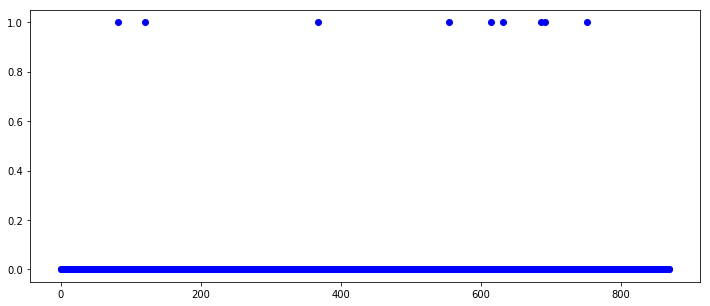

In [102]:
plt.figure(figsize=(12, 5))
plt.plot(y_train, 'go', color='b')

plt.show()

### Кросс-валидация и подбор параметров

In [130]:
# функция кросс валидации
def show_cv(clf_i, name, f, l, cv, score='r2', param=None, vbs=False):  #f1
    if param: 
        grid_cv = GridSearchCV(
            clf_i,
            param,
            scoring=score,
            cv=cv,
            verbose=vbs,
            n_jobs=10
        )
        grid_cv.fit(f, l)
        clf_i = grid_cv.best_estimator_
        print(grid_cv.best_params_)
    score = cross_val_score(clf_i,f,l,cv=cv, scoring=score, n_jobs=10)
    print(name, score.mean(), score)
    return score

In [133]:
ridge_model=RidgeClassifier(random_state=0)
# lasso_model=Lasso(random_state=0)
logist_model=LogisticRegression(random_state=0)  
tree_model=DecisionTreeClassifier(random_state=0)
rf_model=RandomForestClassifier(random_state=0)
xgb_model = xgb.XGBClassifier(random_state=0)
linear_svc_model = LinearSVC(random_state=0)
svc_model = SVC(random_state=0)

clfs = [
        ["Ridge", ridge_model],
#         ["Lasso", lasso_model],
        ["LogistRegr", logist_model],
        ["Tree", tree_model],
        ["RandomForest", rf_model],
        ["XGBoost", xgb_model],
        ["LinearSVC", linear_svc_model],
        ["SVC", svc_model]
       ]

parameters = {
             "Ridge": 
              {
                  "alpha": [0.001, 0.05, 0.1, 0.3,0.5, 1, 3, 5, 10, 15, 30, 50, 75, 100]
              },
#              "Lasso": 
#               {
#                   "alpha": [1,0.3, 0.5, 0.7, 0.1,0.01, 0.05, 0.001, 0.0005]
#               },
              "LogistRegr":
              {
                  "penalty": ['l1','l2'],
                  "C" : [0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000],
                  "max_iter": [100,200,300,400,500,600,700,800,900,1000],
                  "tol": [1e-5,1e-4,1e-3,1e-2], 
                  "class_weight": ['balanced']       
              },
              "Tree":
              {
                   "max_depth":[5,10,15],
                   "max_features":[0.6,0.7,0.8,0.9],
                   "min_samples_split":[2,3,5,7]

              },
              "RandomForest":
              {
                  "max_depth":[4,5,6,8],
                  "max_features":[0.4,0.5,0.6,0.7,0.8],
                  "min_samples_split":[2,3,5,7],
                  "n_estimators":[20,30,40,50,100]
              },
              "XGBoost":
              {
                  "n_estimators": [20,30,40,50,100],
                  "max_depth": [3, 5, 7,10],
                  "learning_rate": [0.01, 0.1, 0,2, 0,5],
                  "subsample": [0.4, 0.5, 0.6, 0.8],
                  "colsample_bytree": [0.5, 0.6, 0.7],
                  'gamma': [0.1,0.2,0.3,0.5,1]  
              },
                 "LinearSVC":
              {
                    "penalty": ['l2'],
                    "loss": ['hinge', 'squared_hinge'],
                    "tol": [1e-5,1e-4,1e-3,1e-2],
                    "C" : [0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000],
                    "class_weight": ['balanced'], 
                    "max_iter": [50,100,150,200,250]
              },
                "SVC":
              {
                    "tol": [1e-5,1e-4,1e-3,1e-2],
                    "C" : [0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000],
                    "class_weight": ['balanced'], 
                    "max_iter": [50,100,150,200,250] 
              }             
           
             }

size = len(y_train)
folds = 3
cv = KFold(size, n_folds = folds, shuffle = True, random_state = 0)

score_ridge = show_cv(ridge_model, "Ridge", x_train, y_train, cv = cv, param = parameters.get("Ridge"), vbs = True)
# score_lasso = show_cv(lasso_model, "Lasso", x_train, y_train, cv = cv, param = parameters.get("Lasso"), vbs = True)
score_logist= show_cv(logist_model,"LogistRegr",x_train, y_train,cv=cv,param=parameters.get("LogistRegr"),vbs=True)
score_tree= show_cv(tree_model,"Tree",x_train, y_train,cv=cv,param=parameters.get("Tree"),vbs=True)
score_rf = show_cv(rf_model, "RandomForest", x_train, y_train, cv = cv, param = parameters.get("RandomForest"), vbs = True)
score_xgb = show_cv(xgb_model, "XGBoost", x_train, y_train, cv = cv, param = parameters.get("XGBoost"), vbs = True)
score_linear_svc = show_cv(linear_svc_model, "LinearSVC", x_train, y_train, cv = cv, param = parameters.get("LinearSVC"), vbs = True)
score_svc = show_cv(svc_model, "SVC", x_train, y_train, cv = cv, param = parameters.get("SVC"), vbs = True)

Fitting 3 folds for each of 360 candidates, totalling 1080 fits


[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:   16.8s
[Parallel(n_jobs=10)]: Done 664 tasks      | elapsed:   19.2s
[Parallel(n_jobs=10)]: Done 1080 out of 1080 | elapsed:   20.8s finished


{'C': 1, 'class_weight': 'balanced', 'loss': 'squared_hinge', 'max_iter': 50, 'penalty': 'l2', 'tol': 1e-05}
LinearSVC -1.4712797340534574 [-1.02189781 -2.03296703 -1.35897436]
Fitting 3 folds for each of 180 candidates, totalling 540 fits


[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:   13.1s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:   16.3s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:   21.9s
[Parallel(n_jobs=10)]: Done 540 out of 540 | elapsed:   24.2s finished


{'C': 10, 'class_weight': 'balanced', 'max_iter': 100, 'tol': 1e-05}
SVC -0.347971979358841 [-0.01094891 -0.01098901 -1.02197802]


In [134]:
# Лучшие параметры
#     {'alpha': 3}
# Ridge -0.23563541081789285 [-0.34793187 -0.01098901 -0.34798535]
#     {'alpha': 0.7}
# Lasso -0.13242779791670692 [-0.26225194 -0.01681966 -0.1182118 ]
#     {'C': 1e-05, 'class_weight': 'balanced', 'max_iter': 100, 'penalty': 'l1', 'tol': 1e-05}
# LogistRegr -3.1562124007379495 [-4.72871046 -2.70695971 -2.03296703]
#     {'max_depth': 5, 'max_features': 0.6, 'min_samples_split': 7}
# Tree -0.01097564236250396 [-0.01094891 -0.01098901 -0.01098901]
#     {'max_depth': 4, 'max_features': 0.7, 'min_samples_split': 2, 'n_estimators': 40}
# RandomForest 0.10135646996960838 [-0.01094891  0.32600733 -0.01098901]
#     {'colsample_bytree': 0.6, 'gamma': 0.1, 'learning_rate': 2, 'max_depth': 3, 'n_estimators': 20, 'subsample': 0.4}
# XGBoost 0.10135646996960841 [-0.01094891 -0.01098901  0.32600733]
#     {'C': 1, 'class_weight': 'balanced', 'loss': 'squared_hinge', 'max_iter': 50, 'penalty': 'l2', 'tol': 1e-05}
# LinearSVC -1.4712797340534574 [-1.02189781 -2.03296703 -1.35897436]
#     {'C': 10, 'class_weight': 'balanced', 'max_iter': 100, 'tol': 1e-05}
# SVC -0.347971979358841 [-0.01094891 -0.01098901 -1.02197802]

In [143]:
def mae(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred))) 
def smape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return 100*np.mean((np.abs(y_true - y_pred))/(abs(y_true)+abs(y_pred)))
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
def wape(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return 100*sum(np.abs((y_true - y_pred)))/sum(y_true)

### Ridge

In [155]:
clf_ridge = RidgeClassifier(alpha=3,  random_state =0, normalize=True)
clf_ridge.fit(x_train, y_train) 

RidgeClassifier(alpha=3, class_weight=None, copy_X=True, fit_intercept=True,
        max_iter=None, normalize=True, random_state=0, solver='auto',
        tol=0.001)

In [156]:
clf_ridge.score(x_train, y_train)

0.9891435464414958

In [157]:
ridge = clf_ridge.predict(x_test)

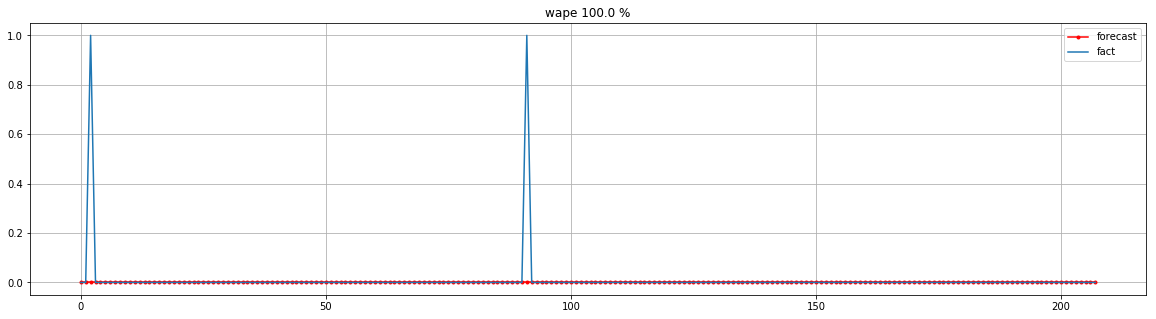

In [158]:
plt.figure(figsize=(20, 5))
plt.plot(ridge, ".r-", label="forecast")

plt.plot(y_test.values, label="fact")
plt.legend(loc="best")
plt.title("wape {} %".format(round(wape(y_test, ridge))))
plt.legend(loc="best")
plt.legend()
plt.grid(True)

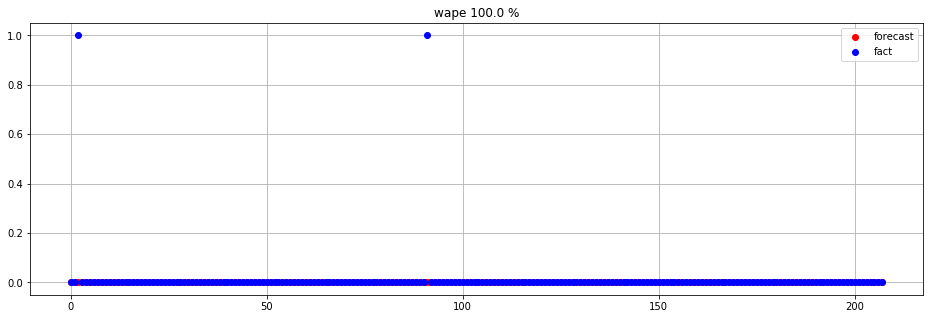

In [159]:
plt.figure(figsize=(16, 5))
plt.plot(ridge, 'go', color='r', label="forecast")
plt.plot(y_test.values, 'go', color='b',label="fact")
plt.legend(loc="best")
plt.title("wape {} %".format(round(wape(y_test, ridge))))
plt.legend(loc="best")
plt.legend()
plt.grid(True)

In [160]:
mae(y_test.values, ridge)

0.009615384615384616

In [161]:
coefficient_of_dermination = r2_score(y_test.values, ridge)
coefficient_of_dermination

-0.009708737864077444

### Lasso

In [170]:
# clf_lasso = Lasso(alpha=0.7,  random_state =0, normalize=True)
# clf_lasso.fit(x_train, y_train) 

Lasso(alpha=0.7, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=0,
   selection='cyclic', tol=0.0001, warm_start=False)

In [171]:
# clf_lasso.score(x_train, y_train)

0.0

In [172]:
# lasso_forc = clf_lasso.predict(x_test)

In [173]:
# mae(y_test.values, lasso_forc)

0.020263060220840682

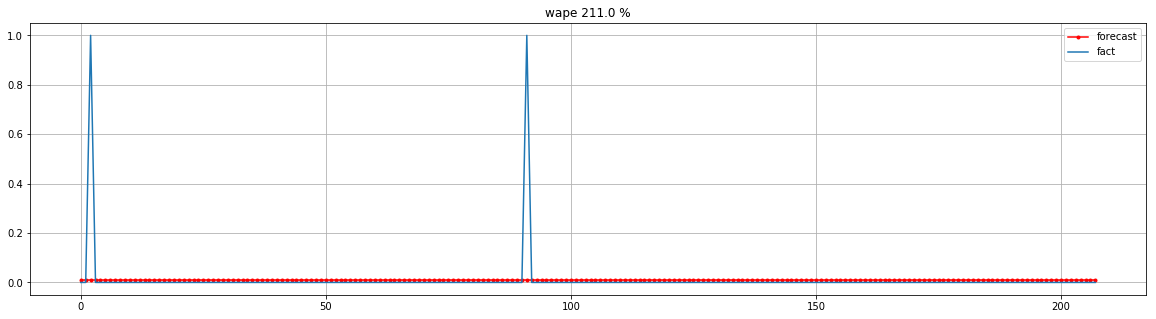

In [174]:
# plt.figure(figsize=(20, 5))
# plt.plot(lasso_forc, ".r-", label="forecast")

# plt.plot(y_test.values, label="fact")
# plt.legend(loc="best")
# plt.title("wape {} %".format(round(wape(y_test, lasso_forc))))
# plt.legend(loc="best")
# plt.legend()
# plt.grid(True)

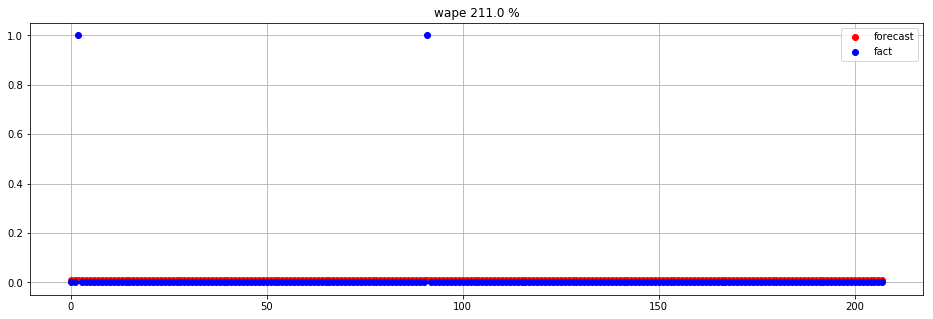

In [175]:
# plt.figure(figsize=(16, 5))
# plt.plot(lasso_forc, 'go', color='r', label="forecast")
# plt.plot(y_test.values, 'go', color='b',label="fact")
# plt.legend(loc="best")
# plt.title("wape {} %".format(round(wape(y_test, lasso_forc))))
# plt.legend(loc="best")
# plt.legend()
# plt.grid(True)

In [176]:
# coefficient_of_dermination = r2_score(y_test.values, lasso_forc)
# coefficient_of_dermination

-0.0001617414266692485

### LogistRegr

In [178]:
clf_logreg = LogisticRegression(C= 1e-05, class_weight= 'balanced', max_iter= 100, penalty= 'l1', tol= 1e-05,  random_state =1)
clf_logreg.fit(x_train, y_train) 

LogisticRegression(C=1e-05, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=1,
          solver='liblinear', tol=1e-05, verbose=0, warm_start=False)

In [179]:
clf_logreg.score(x_train, y_train)

0.9589867310012062

In [180]:
logreg_forc = clf_logreg.predict(x_test)

In [181]:
mae(y_test.values, logreg_forc)

0.052884615384615384

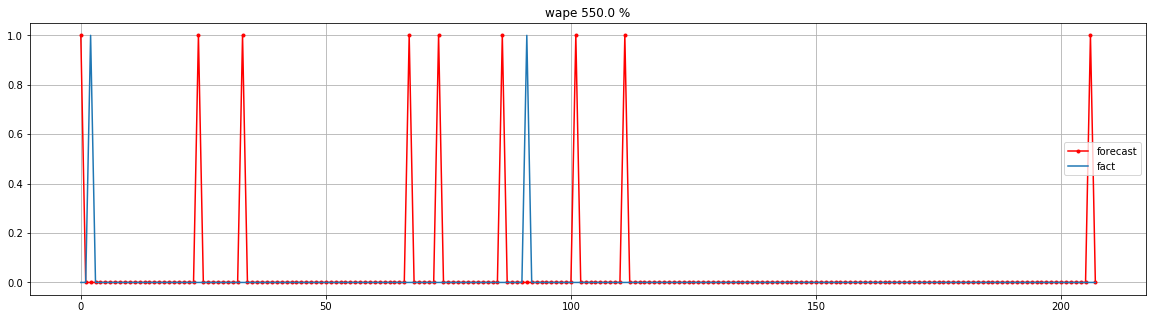

In [182]:
plt.figure(figsize=(20, 5))
plt.plot(logreg_forc, ".r-", label="forecast")

plt.plot(y_test.values, label="fact")
plt.legend(loc="best")
plt.title("wape {} %".format(round(wape(y_test, logreg_forc))))
plt.legend(loc="best")
plt.legend()
plt.grid(True)

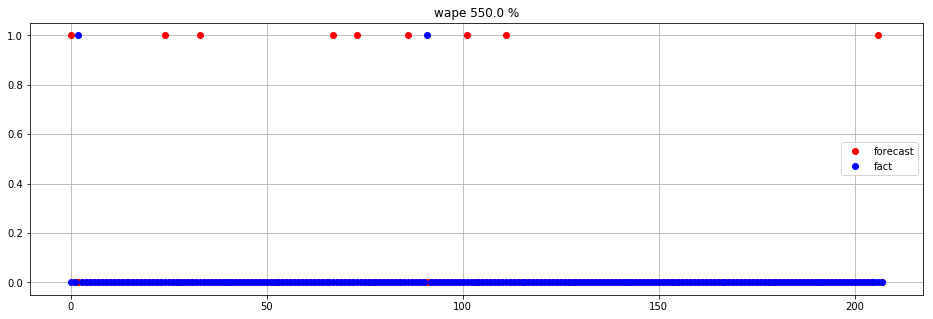

In [183]:
plt.figure(figsize=(16, 5))
plt.plot(logreg_forc, 'go', color='r', label="forecast")
plt.plot(y_test.values, 'go', color='b',label="fact")
plt.legend(loc="best")
plt.title("wape {} %".format(round(wape(y_test, logreg_forc))))
plt.legend(loc="best")
plt.legend()
plt.grid(True)

In [184]:
coefficient_of_dermination = r2_score(y_test.values, logreg_forc)
coefficient_of_dermination

-4.5533980582524265

### Tree

In [185]:
clf_tree = DecisionTreeClassifier(max_depth = 5, max_features = 0.6,  min_samples_split = 7, random_state =0)
clf_tree.fit(x_train, y_train) 

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=0.6, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=7,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [186]:
clf_tree.score(x_train, y_train)

0.991556091676719

In [187]:
tree_forc = clf_tree.predict(x_test)

In [189]:
mae(y_test.values, tree_forc)

0.009615384615384616

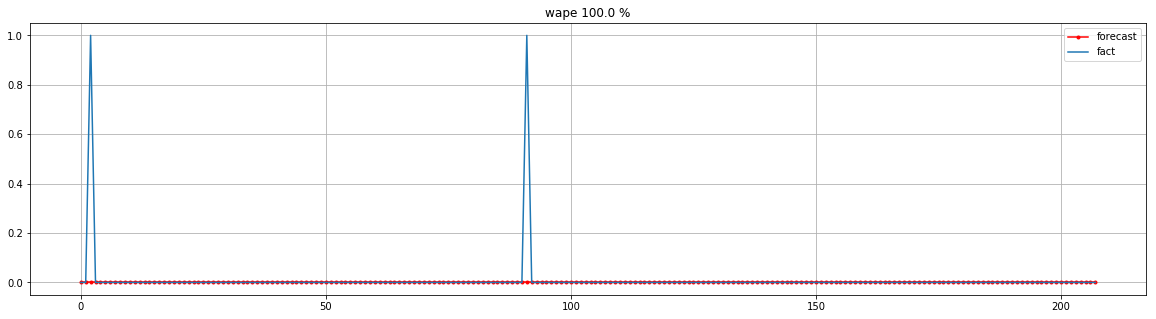

In [190]:
plt.figure(figsize=(20, 5))
plt.plot(tree_forc, ".r-", label="forecast")
plt.plot(y_test.values, label="fact")
plt.legend(loc="best")
plt.title("wape {} %".format(round(wape(y_test, tree_forc))))
plt.legend(loc="best")
plt.legend()
plt.grid(True)

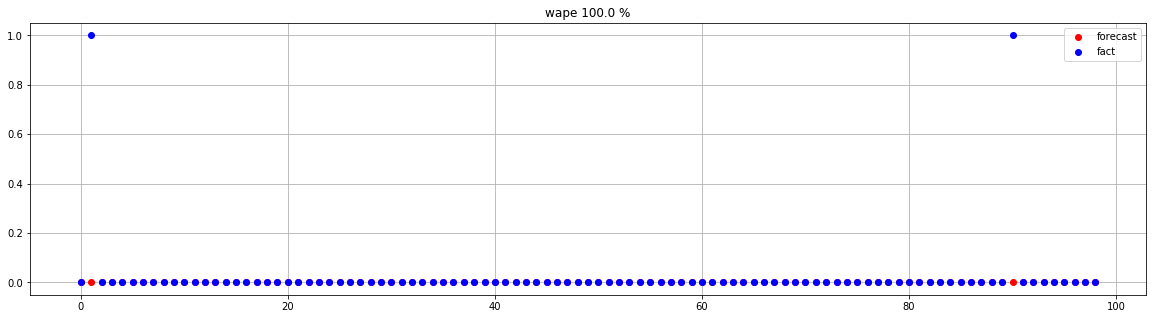

In [192]:
plt.figure(figsize=(20, 5))
plt.plot(tree_forc[1:100], 'go', color = 'r', label="forecast")
plt.plot(y_test.values[1:100], 'go', color = 'b',label="fact")
plt.legend(loc="best")
plt.title("wape {} %".format(round(wape(y_test, tree_forc))))
plt.legend(loc="best")
plt.legend()
plt.grid(True)

In [193]:
coefficient_of_dermination = r2_score(y_test, tree_forc)
coefficient_of_dermination

-0.009708737864077444

In [228]:
independent_columns_names = x_train.columns.values
pd.DataFrame({'feat': independent_columns_names,
              'coef': clf_tree.feature_importances_}).sort_values(by='coef', ascending=False).head(10)

,coef,feat
81,0.386800,Tax_inspection_09
0,0.385867,1110
92,0.092368,Tax_inspection_21
22,0.074490,1300
103,0.060474,Tax_inspection_32
98,0.000000,Tax_inspection_27
99,0.000000,Tax_inspection_28
100,0.000000,Tax_inspection_29
101,0.000000,Tax_inspection_30
102,0.000000,Tax_inspection_31


In [ ]:
# 1110 нематериальные активы
# 1130 капитал и резервы

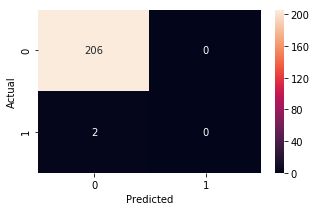

In [232]:
import seaborn as sns 
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, tree_forc)
fig, ax = plt.subplots(figsize=(5,3))
sns.heatmap(conf_mat, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [236]:
from sklearn import metrics 
print(metrics.classification_report(y_test, tree_forc))

             precision    recall  f1-score   support

          0       0.99      1.00      1.00       206
          1       0.00      0.00      0.00         2

avg / total       0.98      0.99      0.99       208



### RF

In [195]:
clf_rf = RandomForestClassifier(max_depth = 4, max_features = 0.7, min_samples_split = 2, n_estimators = 40, random_state =0)
clf_rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features=0.7, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [196]:
clf_rf.score(x_train, y_train)

0.9927623642943305

In [197]:
RF_forc = clf_rf.predict(x_test)

In [198]:
mae(y_test.values, RF_forc)

0.009615384615384616

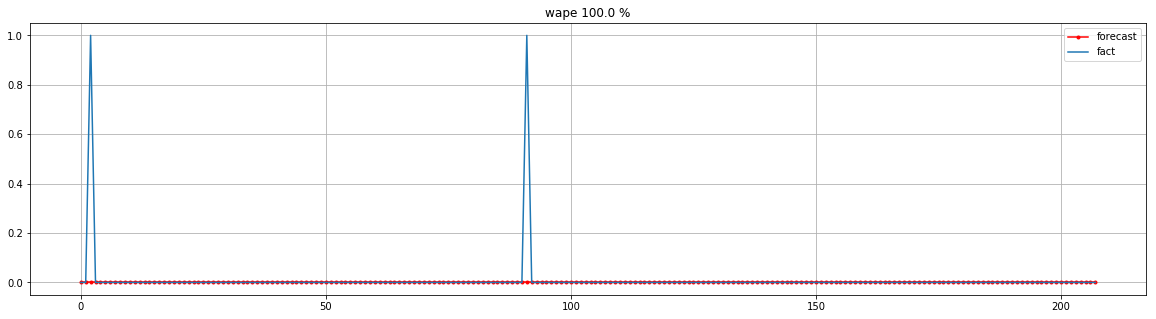

In [199]:
plt.figure(figsize=(20, 5))
plt.plot(RF_forc, ".r-", label="forecast")
plt.plot(y_test.values, label="fact")
plt.legend(loc="best")
plt.title("wape {} %".format(round(wape(y_test, RF_forc))))
plt.legend(loc="best")
plt.legend()
plt.grid(True)

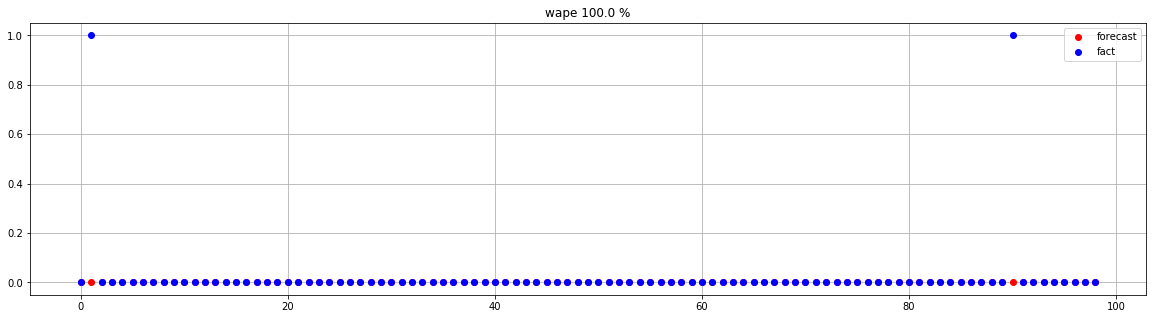

In [200]:
plt.figure(figsize=(20, 5))
plt.plot(RF_forc[1:100], 'go', color = 'r', label="forecast")
plt.plot(y_test.values[1:100], 'go', color = 'b',label="fact")
plt.legend(loc="best")
plt.title("wape {} %".format(round(wape(y_test, RF_forc))))
plt.legend(loc="best")
plt.legend()
plt.grid(True)

In [201]:
coefficient_of_dermination = r2_score(y_test, RF_forc)
coefficient_of_dermination

-0.009708737864077444

In [229]:
independent_columns_names = x_train.columns.values
pd.DataFrame({'feat': independent_columns_names,
              'coef': clf_rf.feature_importances_}).sort_values(by='coef', ascending=False).head(10)

,coef,feat
81,0.138525,Tax_inspection_09
0,0.102151,1110
92,0.094149,Tax_inspection_21
22,0.084873,1300
103,0.047614,Tax_inspection_32
75,0.043770,Tax_inspection_02
33,0.043271,1700
34,0.043036,2110
35,0.035054,2120
12,0.031776,1250


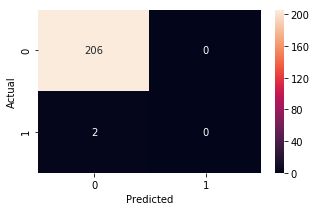

In [233]:
import seaborn as sns 
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, RF_forc)
fig, ax = plt.subplots(figsize=(5,3))
sns.heatmap(conf_mat, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [237]:
from sklearn import metrics 
print(metrics.classification_report(y_test, RF_forc))

             precision    recall  f1-score   support

          0       0.99      1.00      1.00       206
          1       0.00      0.00      0.00         2

avg / total       0.98      0.99      0.99       208



### XGBoost

In [203]:
clf_xgb = xgb.XGBClassifier(max_depth = 3, colsample_bytree = 0.6, gamma = 0.1, learning_rate = 2, n_estimators = 20, subsample = 0.4, random_state =0)
clf_xgb.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.6, gamma=0.1, learning_rate=2, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=20,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.4)

In [204]:
clf_xgb.score(x_train, y_train)

0.991556091676719

In [205]:
xgb_forc = clf_xgb.predict(x_test)

In [206]:
mae(y_test.values, xgb_forc)

0.009615384615384616

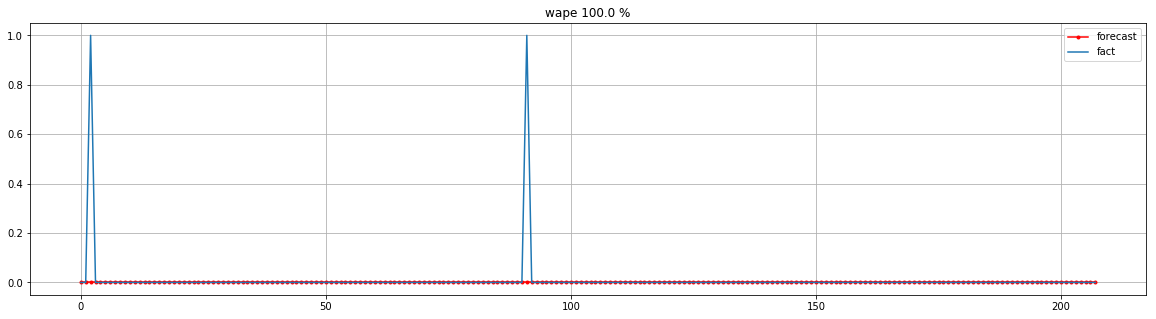

In [207]:
plt.figure(figsize=(20, 5))
plt.plot(xgb_forc, ".r-", label="forecast")
plt.plot(y_test.values, label="fact")
plt.legend(loc="best")
plt.title("wape {} %".format(round(wape(y_test, xgb_forc))))
plt.legend(loc="best")
plt.legend()
plt.grid(True)

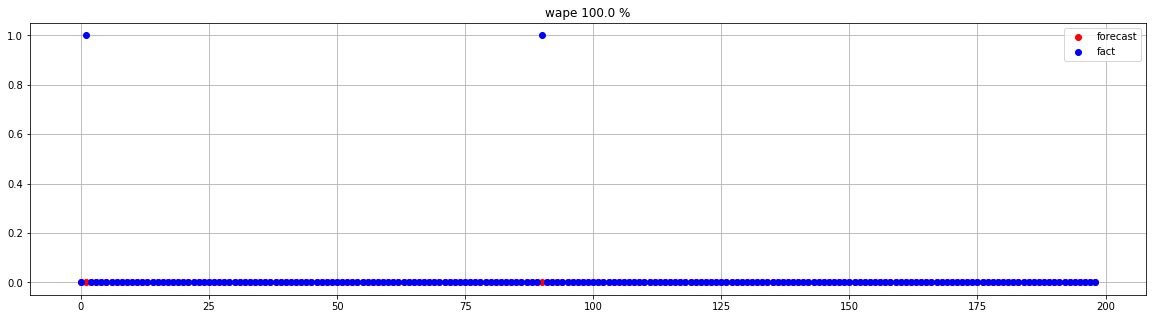

In [210]:
plt.figure(figsize=(20, 5))
plt.plot(xgb_forc[1:200], 'go', color = 'r', label="forecast")
plt.plot(y_test.values[1:200], 'go', color = 'b',label="fact")
plt.legend(loc="best")
plt.title("wape {} %".format(round(wape(y_test, xgb_forc))))
plt.legend(loc="best")
plt.legend()
plt.grid(True)

In [211]:
coefficient_of_dermination = r2_score(y_test, xgb_forc)
coefficient_of_dermination

-0.009708737864077444

In [230]:
independent_columns_names = x_train.columns.values
pd.DataFrame({'feat': independent_columns_names,
              'coef': clf_xgb.feature_importances_}).sort_values(by='coef', ascending=False).head(10)

,coef,feat
15,0.260870,1600
2,0.130435,1150
8,0.086957,1210
33,0.086957,1700
22,0.086957,1300
14,0.043478,1200
27,0.043478,1510
12,0.043478,1250
34,0.043478,2110
28,0.043478,1520


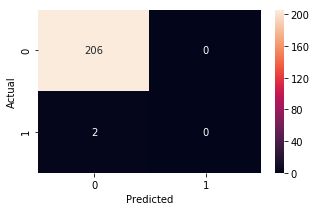

In [234]:
import seaborn as sns 
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, xgb_forc)
fig, ax = plt.subplots(figsize=(5,3))
sns.heatmap(conf_mat, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [238]:
from sklearn import metrics 
print(metrics.classification_report(y_test, xgb_forc))

             precision    recall  f1-score   support

          0       0.99      1.00      1.00       206
          1       0.00      0.00      0.00         2

avg / total       0.98      0.99      0.99       208



### LinearSVC

In [212]:
clf_lsvc = LinearSVC(C= 1, class_weight= 'balanced', loss= 'squared_hinge', max_iter= 50, penalty= 'l2', tol= 1e-05, random_state =0)
clf_lsvc.fit(x_train, y_train)

LinearSVC(C=1, class_weight='balanced', dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=50,
     multi_class='ovr', penalty='l2', random_state=0, tol=1e-05, verbose=0)

In [213]:
clf_lsvc.score(x_train, y_train)

0.971049457177322

In [214]:
lsvc_forc = clf_lsvc.predict(x_test)

In [215]:
mae(y_test.values, lsvc_forc)

0.057692307692307696

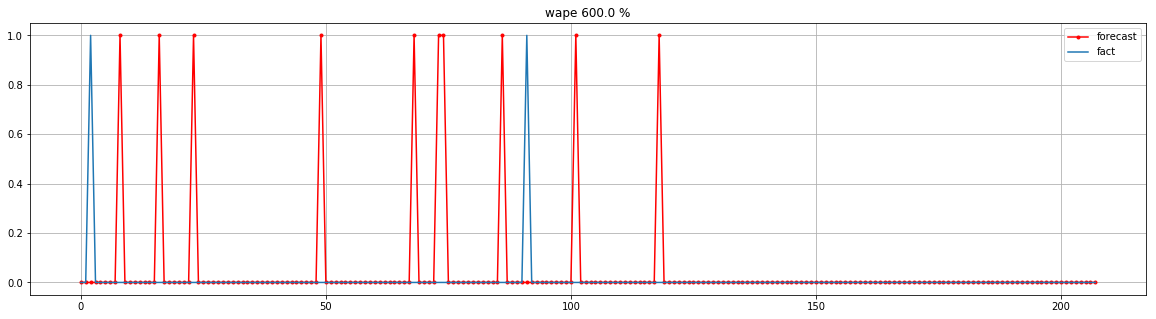

In [216]:
plt.figure(figsize=(20, 5))
plt.plot(lsvc_forc, ".r-", label="forecast")
plt.plot(y_test.values, label="fact")
plt.legend(loc="best")
plt.title("wape {} %".format(round(wape(y_test, lsvc_forc))))
plt.legend(loc="best")
plt.legend()
plt.grid(True)

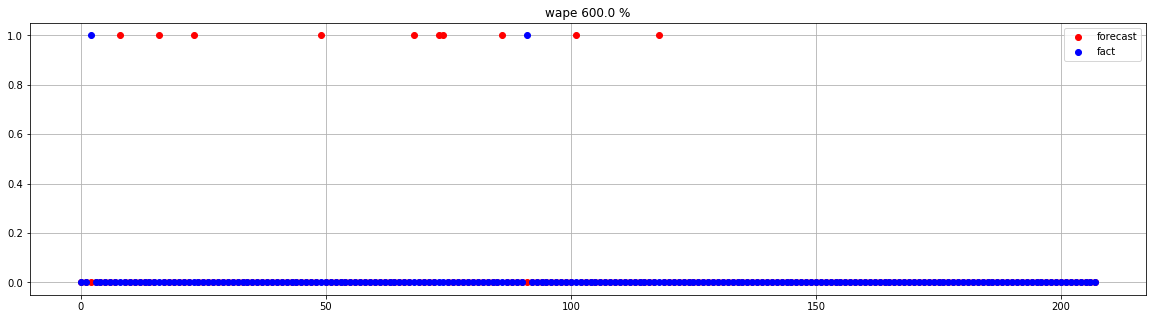

In [217]:
plt.figure(figsize=(20, 5))
plt.plot(lsvc_forc, 'go', color = 'r', label="forecast")
plt.plot(y_test.values, 'go', color = 'b',label="fact")
plt.legend(loc="best")
plt.title("wape {} %".format(round(wape(y_test, lsvc_forc))))
plt.legend(loc="best")
plt.legend()
plt.grid(True)

In [218]:
coefficient_of_dermination = r2_score(y_test, lsvc_forc)
coefficient_of_dermination

-5.058252427184465

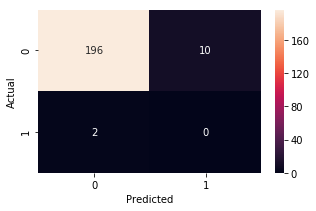

In [235]:
import seaborn as sns 
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, lsvc_forc)
fig, ax = plt.subplots(figsize=(5,3))
sns.heatmap(conf_mat, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [239]:
from sklearn import metrics 
print(metrics.classification_report(y_test, lsvc_forc))

             precision    recall  f1-score   support

          0       0.99      0.95      0.97       206
          1       0.00      0.00      0.00         2

avg / total       0.98      0.94      0.96       208



### SVC

In [219]:
clf_svc = SVC(C= 10, class_weight= 'balanced', max_iter= 100, tol= 1e-05, random_state =0)
clf_svc.fit(x_train, y_train)

SVC(C=10, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=100, probability=False, random_state=0, shrinking=True,
  tol=1e-05, verbose=False)

In [220]:
clf_svc.score(x_train, y_train)

0.9951749095295537

In [221]:
svc_forc = clf_svc.predict(x_test)

In [222]:
mae(y_test.values, svc_forc)

0.028846153846153848

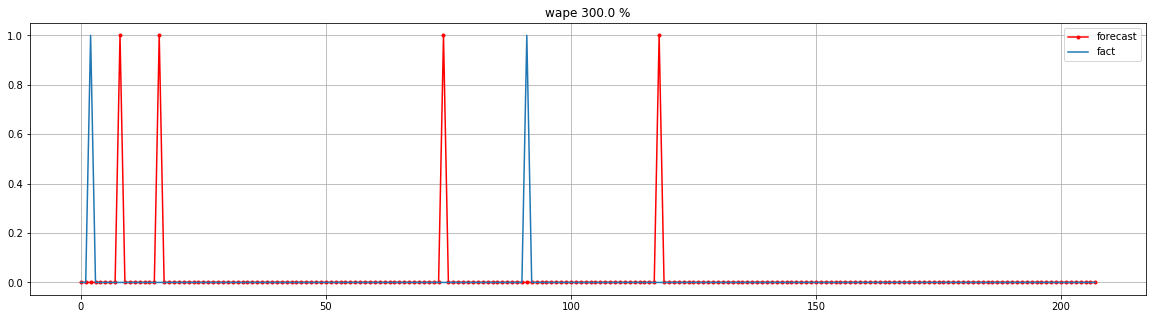

In [223]:
plt.figure(figsize=(20, 5))
plt.plot(svc_forc, ".r-", label="forecast")
plt.plot(y_test.values, label="fact")
plt.legend(loc="best")
plt.title("wape {} %".format(round(wape(y_test, svc_forc))))
plt.legend(loc="best")
plt.legend()
plt.grid(True)

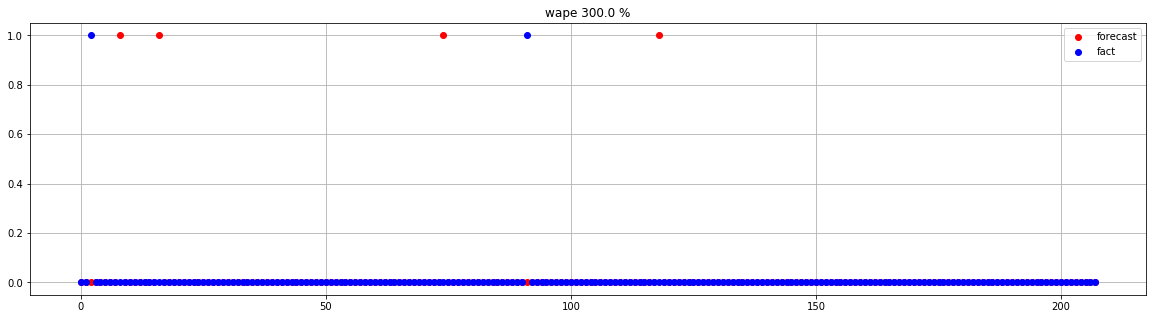

In [224]:
plt.figure(figsize=(20, 5))
plt.plot(svc_forc, 'go', color = 'r', label="forecast")
plt.plot(y_test.values, 'go', color = 'b',label="fact")
plt.legend(loc="best")
plt.title("wape {} %".format(round(wape(y_test, svc_forc))))
plt.legend(loc="best")
plt.legend()
plt.grid(True)

In [225]:
coefficient_of_dermination = r2_score(y_test, svc_forc)
coefficient_of_dermination

-2.0291262135922326

In [231]:
# ROC AUC code

# fpr1, tpr1, thresholds = roc_curve(y_test, y_pred)
# auc1=auc(fpr1, tpr1)
# print ("auc for the first class",auc1)

# # ploting the roc curve
# plt.plot(fpr1,tpr1)
# plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# plt.xlim([0.0,1.0])
# plt.ylim([0.0,1.0])
# plt.title('Roc curve')
# plt.xlabel('False positive rate')
# plt.ylabel('True positive rate')
# plt.legend(loc="lower right")
# plt.show()

In [ ]:
Дерево решений
Случайный лес
Градиентный бустинг (LightGBM, XGBoost)
SVM

Агропромышленность, строительная
Отдельно статьи, отдельно ИНН..., вместе